In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Leyendo los datos y haciendo una limpieza:

In [138]:
tp=pd.read_csv("tp.csv",encoding='utf-8')

In [139]:
#camiando los nombre de columnas para una mejor comprensio
tp.rename(columns={"Pricing, Delivery_Terms_Quote_Appr":"Pri_Deli_Terms_Quote_Appr",\
                  "Pricing, Delivery_Terms_Approved":"Pri_Deli_Terms_Appr"},inplace=True)
#seteando en formato fecha la columna Account_Created_Date
tp.Account_Created_Date=pd.to_datetime(tp.Account_Created_Date)

Aca se analizara la cantidad de ventas hechas por territorio y Region:

Ahora paso a analizar las Regiones donde se produjeron estas ventas:

In [140]:
cant_vent_Region=tp.groupby("Region").agg({"Region":"count"}).\
rename(columns={"Region":"cant_vent_Region"}).\
sort_values("cant_vent_Region",ascending=False).head(25)

<AxesSubplot:xlabel='Region'>

<Figure size 7200x4320 with 0 Axes>

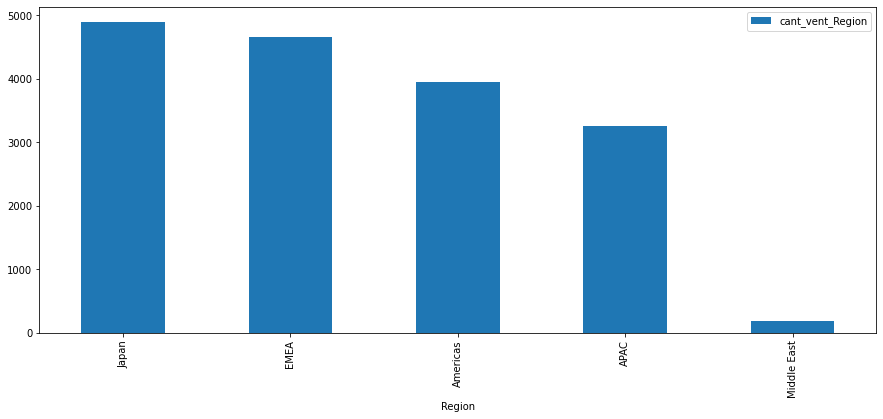

In [141]:
plt.figure(figsize=(100,60))
plt.rcParams["figure.figsize"]=[15,6]
cant_vent_Region.plot(kind="bar",stacked=True)

viendo que aparece como region Japon voy a analizar los datos de region:

In [142]:
tp.Territory=tp.where(tp.Territory.str.contains("None")==False & tp.Region.str.contains("None"),"Japan").Territory

In [143]:
tp.Territory.value_counts().reset_index().head(10)

,index,Territory
0,Japan,5680
1,Germany,1682
2,NW America,1568
3,Australia,1208
4,India,809
5,NE America,760
6,Netherlands,533
7,SE America,493
8,France,449
9,Singapore,441


In [144]:
tp_top10=tp.Territory.value_counts().reset_index().head(10)
tp_top10=tp_top10.rename(columns={"Territory":"cantidad_ventas","index":"Territory"})

In [145]:
tp_top10

,Territory,cantidad_ventas
0,Japan,5680
1,Germany,1682
2,NW America,1568
3,Australia,1208
4,India,809
5,NE America,760
6,Netherlands,533
7,SE America,493
8,France,449
9,Singapore,441


In [146]:
top10=tp[["Territory","Stage"]].merge(tp_top10,how="right",on="Territory")

In [147]:
top10

,Territory,Stage,cantidad_ventas
0,Japan,Closed Lost,5680
1,Japan,Closed Won,5680
2,Japan,Closed Lost,5680
3,Japan,Closed Lost,5680
4,Japan,Closed Lost,5680
...,...,...,...
13618,Singapore,Closed Won,441
13619,Singapore,Closed Won,441
13620,Singapore,Closed Won,441
13621,Singapore,Closed Lost,441


In [148]:
top10_reset=top10.groupby(["Territory","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [149]:
top10_reset

,Territory,Stage,cantidad_stage
0,Australia,Closed Lost,506
1,Australia,Closed Won,696
2,Australia,Proposal,4
3,Australia,Qualification,2
4,France,Closed Lost,306
5,France,Closed Won,143
6,Germany,Closed Lost,659
7,Germany,Closed Won,1023
8,India,Closed Lost,433
9,India,Closed Won,374


In [150]:
top10_reset

,Territory,Stage,cantidad_stage
0,Australia,Closed Lost,506
1,Australia,Closed Won,696
2,Australia,Proposal,4
3,Australia,Qualification,2
4,France,Closed Lost,306
5,France,Closed Won,143
6,Germany,Closed Lost,659
7,Germany,Closed Won,1023
8,India,Closed Lost,433
9,India,Closed Won,374


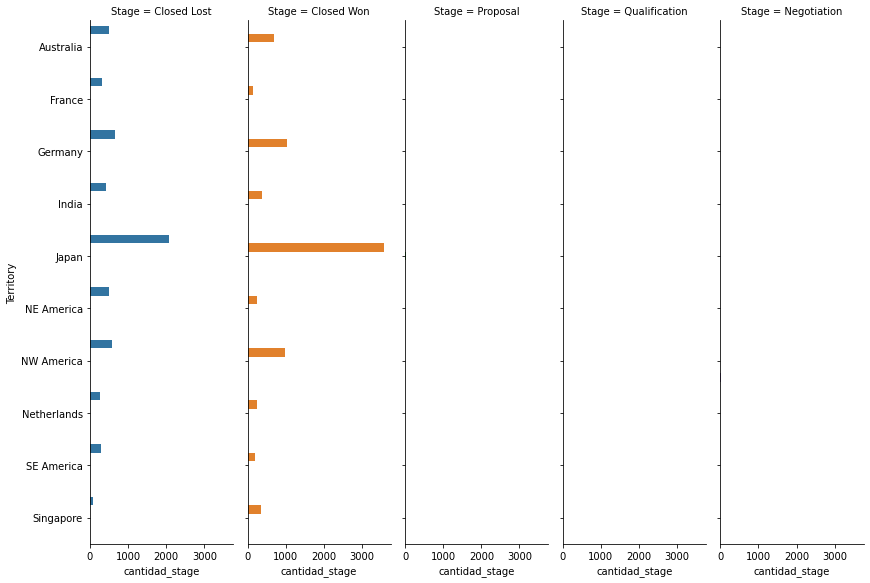

In [154]:
sns.catplot(x="cantidad_stage",y="Territory",col="Stage",\
    data=top10_reset,hue="Stage",kind="bar",height=8, aspect=.3)

Puedo concluir que no puedo sacar informacion de los estados que no sean Closed Lost y Won .. como se puede apreciar
Japon es el pais con el que mas ventas hemos realizado pero tenemos si bien es mucho menor a las ganadas varias 
ventas perdidas, por otro lado vemos que Francia y America son los paises en los que hemos perdido mas ventas que ganadas
y en singapur las ventas hechas has sido mucho mas exitosas en proporcion al resto.

In [155]:
tp.Territory=tp.where(tp.Territory.str.contains(" America")==False,"America").Territory

In [156]:
cant_vent_Territory=tp.groupby("Territory").agg({"Territory":"count"}).\
rename(columns={"Territory":"cant_vent_Territory"}).\
sort_values("cant_vent_Territory",ascending=False).head(25)

<AxesSubplot:xlabel='Territory'>

<Figure size 7200x4320 with 0 Axes>

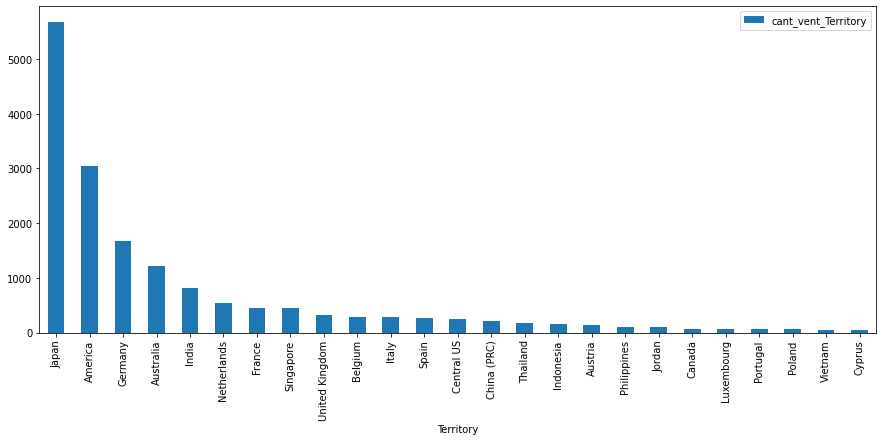

In [157]:
plt.figure(figsize=(100,60))
plt.rcParams["figure.figsize"]=[15,6]
cant_vent_Territory.plot(kind="bar",stacked=True)

ahora analizaremos para estas regiones como se distribuye verdaderamente las ventas si se hizo o no , si fue exitosa o no , etc.

In [158]:
Stage_por_Region=tp.groupby(["Region","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_ventas_Stage"}).reset_index()

In [159]:
#Stage_por_Region_desviacion=Stage_por_Region.groupby('Region').agg({'cantidad_ventas_Stage':"max"}).rename(columns={"cantidad_ventas_Stage":"max_cant_Region"}).reset_index()

NORMALIZE

In [160]:
from sklearn.preprocessing import normalize

In [161]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [162]:
#Stage_por_Region_desviacion["minimo_cant_Region"]=Stage_por_Region.groupby('Region').agg({'cantidad_ventas_Stage':"min"}).rename(columns={"cantidad_ventas_Stage":"minimo_cant_Region"}).reset_index()["minimo_cant_Region"]

In [163]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [164]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [165]:
Stage_por_Region["data_normalize"]=normalize(Stage_por_Region[["cantidad_ventas_Stage"]], axis=0)

In [166]:
Stage_por_Region_md_p=Stage_por_Region.pivot_table(columns="Stage",fill_value=0,index="Region",values="data_normalize")

In [167]:
Stage_por_Region_md_p

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,0.221056,0.309316,0.000000,0.001305,0.000489
Americas,0.349122,0.292512,0.001305,0.000653,0.000000
EMEA,0.357116,0.403122,0.000163,0.000489,0.000000
Japan,0.252216,0.542118,0.000163,0.002284,0.001305
Middle East,0.019577,0.008157,0.001305,0.000979,0.000000


<AxesSubplot:xlabel='Stage', ylabel='Region'>

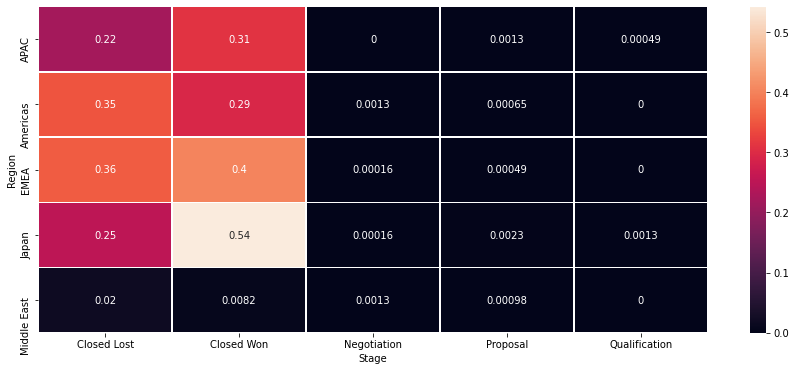

In [168]:
sns.heatmap(Stage_por_Region_md_p,annot=True,linewidths=.5)

CON LOS DATOS NORMALIZADO PODEMOS DARNOS CUENTA QUE NO SERIA RELEVANTE ESTUDIAR LOS CASOS DE VENTAS 
CON NEGOCIACIONES QUE QUEDARON INTERMEDIA PUES DE ESTAS TENEMOS MUY POCA INFORMACION
Y LO UNICO QUE NOS GENERARIA SERIA UN RUIDO EN EL ANALISIS DE DATOS.TAMBIEN SE PUEDE 
APRECIAR QUE LA REGION DE JAPON EMEA Y APAC SON LAS QUE POSEEN MAYOR PROBABILIDAD DE TERMINAR
DE FORMA EXITOSA, Y QUE EN LA REGION DE MIDDLE EAST EN MUCHO MAS PROBABLE PERDER 
LA VENTA POR MUCHO aunque lastimosamante a vista no se pueda determinar la diferencia.

In [169]:
tp.groupby(["Account_Created_Date","Account_Name"]).agg({"Account_Name":"count"})

Account_Name
Account_Created_Date Account_Name                   
2013-07-27           Account_Name_106              2
                     Account_Name_1064            24
                     Account_Name_1067           116
                     Account_Name_1083            22
                     Account_Name_1087            22
...                                              ...
2018-12-17           Account_Name_1786             1
2018-12-19           Account_Name_1327             4
                     Account_Name_705              1
2018-12-20           Account_Name_1571             1
2018-12-21           Account_Name_1825             1

[1637 rows x 1 columns]

In [170]:
tp.Account_Name.value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_1241       1
Account_Name_2049       1
Account_Name_1921       1
Account_Name_1061       1
Account_Name_71         1
Name: Account_Name, Length: 1635, dtype: int64

In [171]:
tp["Account_Created_Date_year"]=tp.Account_Created_Date.dt.year
tp["Account_Created_Date_month"]=tp.Account_Created_Date.dt.month
tp["Account_Created_Date_count"]=tp.Account_Created_Date.dt.month

In [172]:
tp["Account_Created_Date_year"].value_counts()

2015    4927
2013    4550
2016    3115
2017    2210
2014    1381
2018     764
Name: Account_Created_Date_year, dtype: int64

In [173]:
tp_Account_Name_year_stage_count=tp.groupby(["Account_Name","Account_Created_Date_year","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"count_stage"}).reset_index()#.sort_values("count_stage",ascending=False)

In [174]:
tp_Account_Name_year_stage_count=tp_Account_Name_year_stage_count.sort_values("count_stage",ascending=False)

In [175]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Lost")].head(15)
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Won")].head(15)

In [176]:
tp_Account_Name_year_stage_count_won

,Account_Name,Account_Created_Date_year,Stage,count_stage
1023,Account_Name_1888,2015,Closed Won,1018
969,Account_Name_1836,2015,Closed Won,795
1277,Account_Name_25,2013,Closed Won,539
1134,Account_Name_1991,2013,Closed Won,520
581,Account_Name_1508,2015,Closed Won,323
504,Account_Name_1440,2013,Closed Won,267
1291,Account_Name_263,2013,Closed Won,205
730,Account_Name_1642,2014,Closed Won,204
2032,Account_Name_931,2016,Closed Won,203
1595,Account_Name_533,2013,Closed Won,190


In [177]:
tp_Account_Name_year_stage_count_lost

,Account_Name,Account_Created_Date_year,Stage,count_stage
1022,Account_Name_1888,2015,Closed Lost,1104
1276,Account_Name_25,2013,Closed Lost,213
729,Account_Name_1642,2014,Closed Lost,193
1594,Account_Name_533,2013,Closed Lost,93
968,Account_Name_1836,2015,Closed Lost,91
1746,Account_Name_660,2016,Closed Lost,81
1133,Account_Name_1991,2013,Closed Lost,66
434,Account_Name_1378,2014,Closed Lost,57
75,Account_Name_1067,2013,Closed Lost,50
503,Account_Name_1440,2013,Closed Lost,50


In [178]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count_lost.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Cantidad de Ventas Perdidas"})
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count_won.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Cantidad de Ventas Exitosas"})

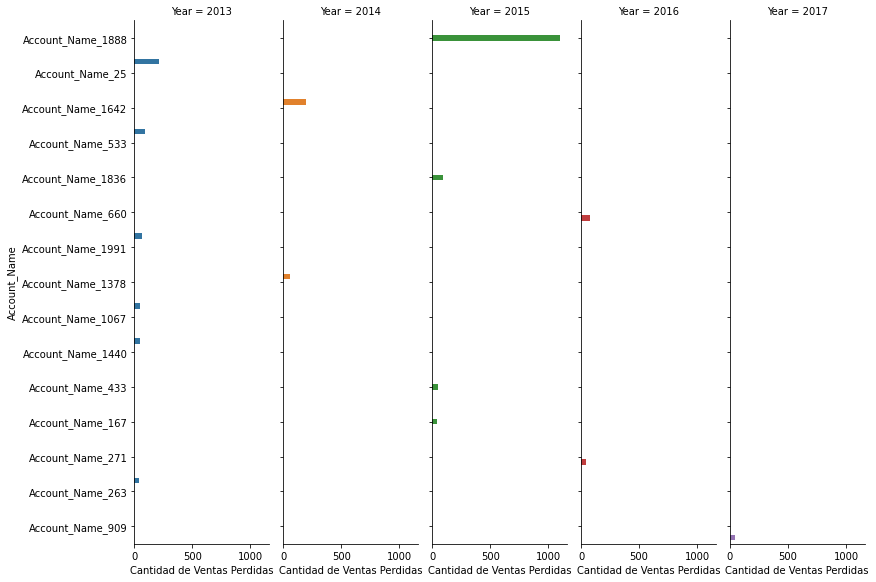

In [179]:
sns.catplot(x="Cantidad de Ventas Perdidas",y="Account_Name",col="Year",\
    data=tp_Account_Name_year_stage_count_lost,hue="Year",kind="bar",height=8, aspect=.3)

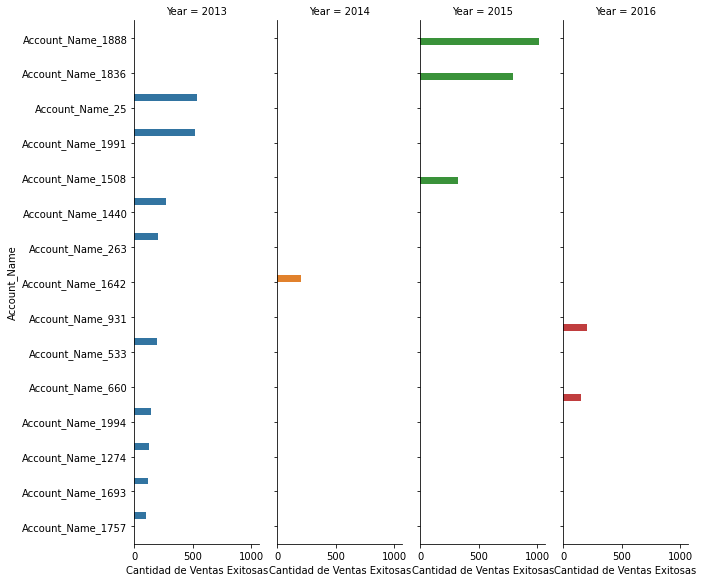

In [180]:
sns.catplot(x="Cantidad de Ventas Exitosas",y="Account_Name",col="Year",\
    data=tp_Account_Name_year_stage_count_won,hue="Year",kind="bar",height=8, aspect=.3)

Puedo notar que los clientes del 2013 son con los que mas hemos tenigos ventas exitosas pero nuestro cliente mas grande
es el cliente 1836 ya que con el hemos tenido la mayor cantidad de ventas exitos por otro lado el cliente 1888 
es con el que hemos tenido si bien una gran cantidad de ventas exitosas 
tambien una gran cantidad de ventas perdidas.

In [181]:
tp["Submitted_for_Approval"].value_counts().head(25)

0    16947
Name: Submitted_for_Approval, dtype: int64

Submitted_for_Approval analizando este dato podemos ver que todas las ventas que fueron enviadas para su aprobacion
entonce no puedo sacar alguna conclucion 

In [182]:
tp["Bureaucratic_Code_0_Approved"].value_counts().head(25)

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [ ]:
tp["Bureaucratic_Code_0_Approval"].value_counts().head(25)

In [184]:
tp_code_Bureaucratic_0=tp.groupby(["Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [185]:
tp_code_Bureaucratic_0

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage,cantidad_stage
0,0,0,Closed Lost,2961
1,0,0,Closed Won,5928
2,1,0,Closed Lost,1846
3,1,0,Closed Won,787
4,1,0,Negotiation,1
5,1,0,Proposal,9
6,1,0,Qualification,11
7,1,1,Closed Lost,2543
8,1,1,Closed Won,2818
9,1,1,Negotiation,17


In [186]:
tp_code_Bureaucratic_0=tp_code_Bureaucratic_0.rename(columns={"Bureaucratic_Code_0_Approval":"Requiere Code 0","Bureaucratic_Code_0_Approved":"Aprobado Code 0"})

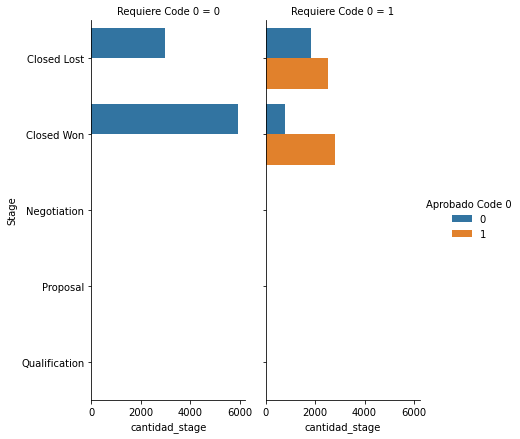

In [188]:
sns.catplot(x="cantidad_stage",y="Stage",col="Requiere Code 0",\
    data=tp_code_Bureaucratic_0,hue="Aprobado Code 0",kind="bar",height=6, aspect=.5)

In [192]:
tp["Bureaucratic_Code"].value_counts().head(25)

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [193]:
Bureaucratic_Code_Stage_Count=tp[["Bureaucratic_Code","Stage"]].groupby(["Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"Bureaucratic_Code_Stage_Count"}).reset_index()

In [194]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count
0,Bureaucratic_Code_0,Closed Won,51
1,Bureaucratic_Code_1,Closed Lost,159
2,Bureaucratic_Code_1,Closed Won,102
3,Bureaucratic_Code_2,Closed Lost,128
4,Bureaucratic_Code_2,Closed Won,114
5,Bureaucratic_Code_3,Closed Lost,1
6,Bureaucratic_Code_3,Closed Won,1
7,Bureaucratic_Code_4,Closed Lost,4291
8,Bureaucratic_Code_4,Closed Won,8253
9,Bureaucratic_Code_4,Negotiation,17


In [195]:
#Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_normalize"]=(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])/(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_max"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])
Bureaucratic_Code_Stage_Count["data_normalize"]=normalize(Bureaucratic_Code_Stage_Count[["Bureaucratic_Code_Stage_Count"]], axis=0)

In [196]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count,data_normalize
0,Bureaucratic_Code_0,Closed Won,51,0.005224
1,Bureaucratic_Code_1,Closed Lost,159,0.016288
2,Bureaucratic_Code_1,Closed Won,102,0.010449
3,Bureaucratic_Code_2,Closed Lost,128,0.013112
4,Bureaucratic_Code_2,Closed Won,114,0.011678
5,Bureaucratic_Code_3,Closed Lost,1,0.000102
6,Bureaucratic_Code_3,Closed Won,1,0.000102
7,Bureaucratic_Code_4,Closed Lost,4291,0.439567
8,Bureaucratic_Code_4,Closed Won,8253,0.845432
9,Bureaucratic_Code_4,Negotiation,17,0.001741


In [197]:
Bureaucratic_Code_Stage_Count_normalize_p=Bureaucratic_Code_Stage_Count.pivot_table(index="Stage",fill_value=0,columns="Bureaucratic_Code",values="data_normalize")

<AxesSubplot:xlabel='Bureaucratic_Code', ylabel='Stage'>

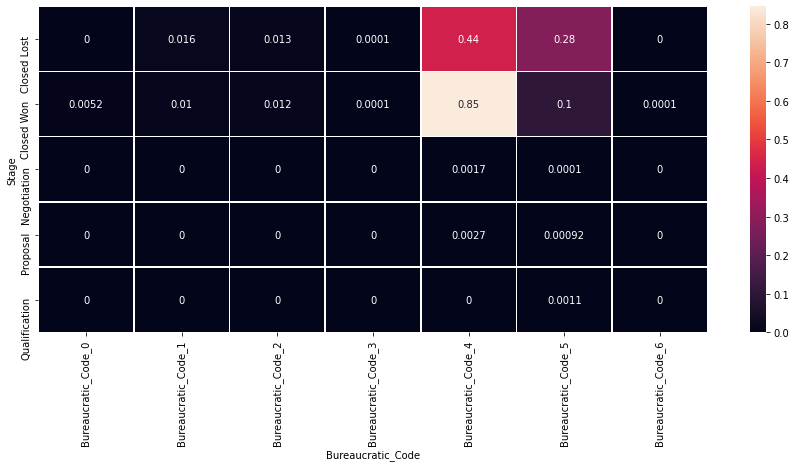

In [198]:
sns.heatmap(Bureaucratic_Code_Stage_Count_normalize_p,annot=True,linewidths=.5)

puedo sacar mas conclusiones de aquellas ventas con codigo burocratio 4 que es mucho mas probable que se cierre una venta si se adquiere
este codigo y si el codigo es 5 es mas probable que se pierda la venta.De los demas codigos no puedo decir mucho ya que no poseo los datos suficentes para hacer una afirmacio.